In [17]:
# %load_ext kedro.ipython
%reload_ext kedro.ipython

[01/11/25 22:55:19] INFO     Registered line magic '%reload_kedro'                                   ]8;id=616250;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=847905;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/ipython/__init__.py#61\61]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=136767;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=988430;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Resolved project path as:                                              ]8;id=117095;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=354068;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/ipython/__init__.py#178\178]8;;\
                             /Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML.                         
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=78881;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=61958;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[01/11/25 22:55:20] INFO     Kedro project ml_house_prices                                          ]8;id=264891;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=721199;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/ipython/__init__.py#144\144]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=917852;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=424033;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/ipython/__init__.py#145\145]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=600069;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=624858;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/ipython/__init__.py#151\151]8;;\

In [18]:
catalog.list()


[
    'house_prices',
    'HP_train',
    'HP_y_train',
    'HP_test',
    'HP_y_test',
    'X_test',
    'X_train',
    'Y_train',
    'Y_test',
    'data',
    'parameters',
    'params:random_state',
    'params:splitting',
    'params:splitting.test_size',
    'params:splitting.target_column',
    'params:splitting.column_to_drop',
    'params:processing',
    'params:processing.encoding',
    'params:processing.encoding.catboost',
    'params:processing.encoding.one_hot'
]

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [54]:
X_train = catalog.load('HP_train')
Y_train = catalog.load('HP_y_train')
X_test = catalog.load('HP_test')
Y_test = catalog.load('HP_y_test')

[01/12/25 08:49:10] INFO     Loading data from HP_train (CSVDataset)...                         ]8;id=185847;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=275801;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py#389\389]8;;\

[01/12/25 08:49:11] INFO     Loading data from HP_y_train (CSVDataset)...                       ]8;id=859330;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=642103;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py#389\389]8;;\

                    INFO     Loading data from HP_test (CSVDataset)...                          ]8;id=35938;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=314221;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py#389\389]8;;\

                    INFO     Loading data from HP_y_test (CSVDataset)...                        ]8;id=35155;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=75800;file:///Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/kedro/io/data_catalog.py#389\389]8;;\

In [73]:
print(len(X_train['city'].unique()))

608


In [62]:
missing_values = X_train.isnull().sum()
# Filter columns with missing values
columns_with_missing = missing_values[missing_values > 0]

print(columns_with_missing)

city                                1
dk_ann_infl_rate%                  14
yield_on_mortgage_credit_bonds%    14
dtype: int64


In [55]:
Y_train.describe()

,purchase_price
count,8.000000e+04
mean,1.927803e+06
std,1.779039e+06
min,2.502000e+05
25%,8.000000e+05
50%,1.400000e+06
75%,2.450000e+06
max,3.725000e+07


In [56]:
Y_test.describe()

,purchase_price
count,2.000000e+04
mean,1.918750e+06
std,1.773023e+06
min,2.509600e+05
25%,8.000000e+05
50%,1.400000e+06
75%,2.450000e+06
max,4.595500e+07


In [ ]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(
    corr, linewidths=1.5, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}
)
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:3                                                                                    │
│                                                                                                  │
│   1 fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20, 20))                                 │
│   2 for i, ax in zip(X_train.columns, axes.flat):                                                │
│ ❱ 3 │   sns.regplot(x=X_train[i], y=Y_train, ax=ax).set(title=f"Regplot of : {i}", xlabel=""     │
│   4 plt.show()                                                                                   │
│   5                                                                                              │
│                                                                                                  │
│ /Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/se │
│ aborn/regression.py:775 in regplot                                                               │
│                                                                                                  │
│   772 │   scatter_kws = {} if scatter_kws is None else copy.copy(scatter_kws)                    │
│   773 │   scatter_kws["marker"] = marker                                                         │
│   774 │   line_kws = {} if line_kws is None else copy.copy(line_kws)                             │
│ ❱ 775 │   plotter.plot(ax, scatter_kws, line_kws)                                                │
│   776 │   return ax                                                                              │
│   777                                                                                            │
│   778                                                                                            │
│                                                                                                  │
│ /Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/se │
│ aborn/regression.py:384 in plot                                                                  │
│                                                                                                  │
│   381 │   │   │   self.scatterplot(ax, scatter_kws)                                              │
│   382 │   │                                                                                      │
│   383 │   │   if self.fit_reg:                                                                   │
│ ❱ 384 │   │   │   self.lineplot(ax, line_kws)                                                    │
│   385 │   │                                                                                      │
│   386 │   │   # Label the axes                                                                   │
│   387 │   │   if hasattr(self.x, "name"):                                                        │
│                                                                                                  │
│ /Users/zofiab/Documents/2024-2025/ML_project/House_prices/ML/venv/lib/python3.9/site-packages/se │
│ aborn/regression.py:429 in lineplot                                                              │
│                                                                                                  │
│   426 │   def lineplot(self, ax, kws):                                                           │
│   427 │   │   """Draw the model."""                                                              │
│   428 │   │   # Fit the regression model                                                         │
│ ❱ 429 │   │   grid, yhat, err_bands = self.fit_regression(ax)                                    │
│   430 │   │   edges = grid[0], grid[-1]                                                          │
│   431 │   │                                                

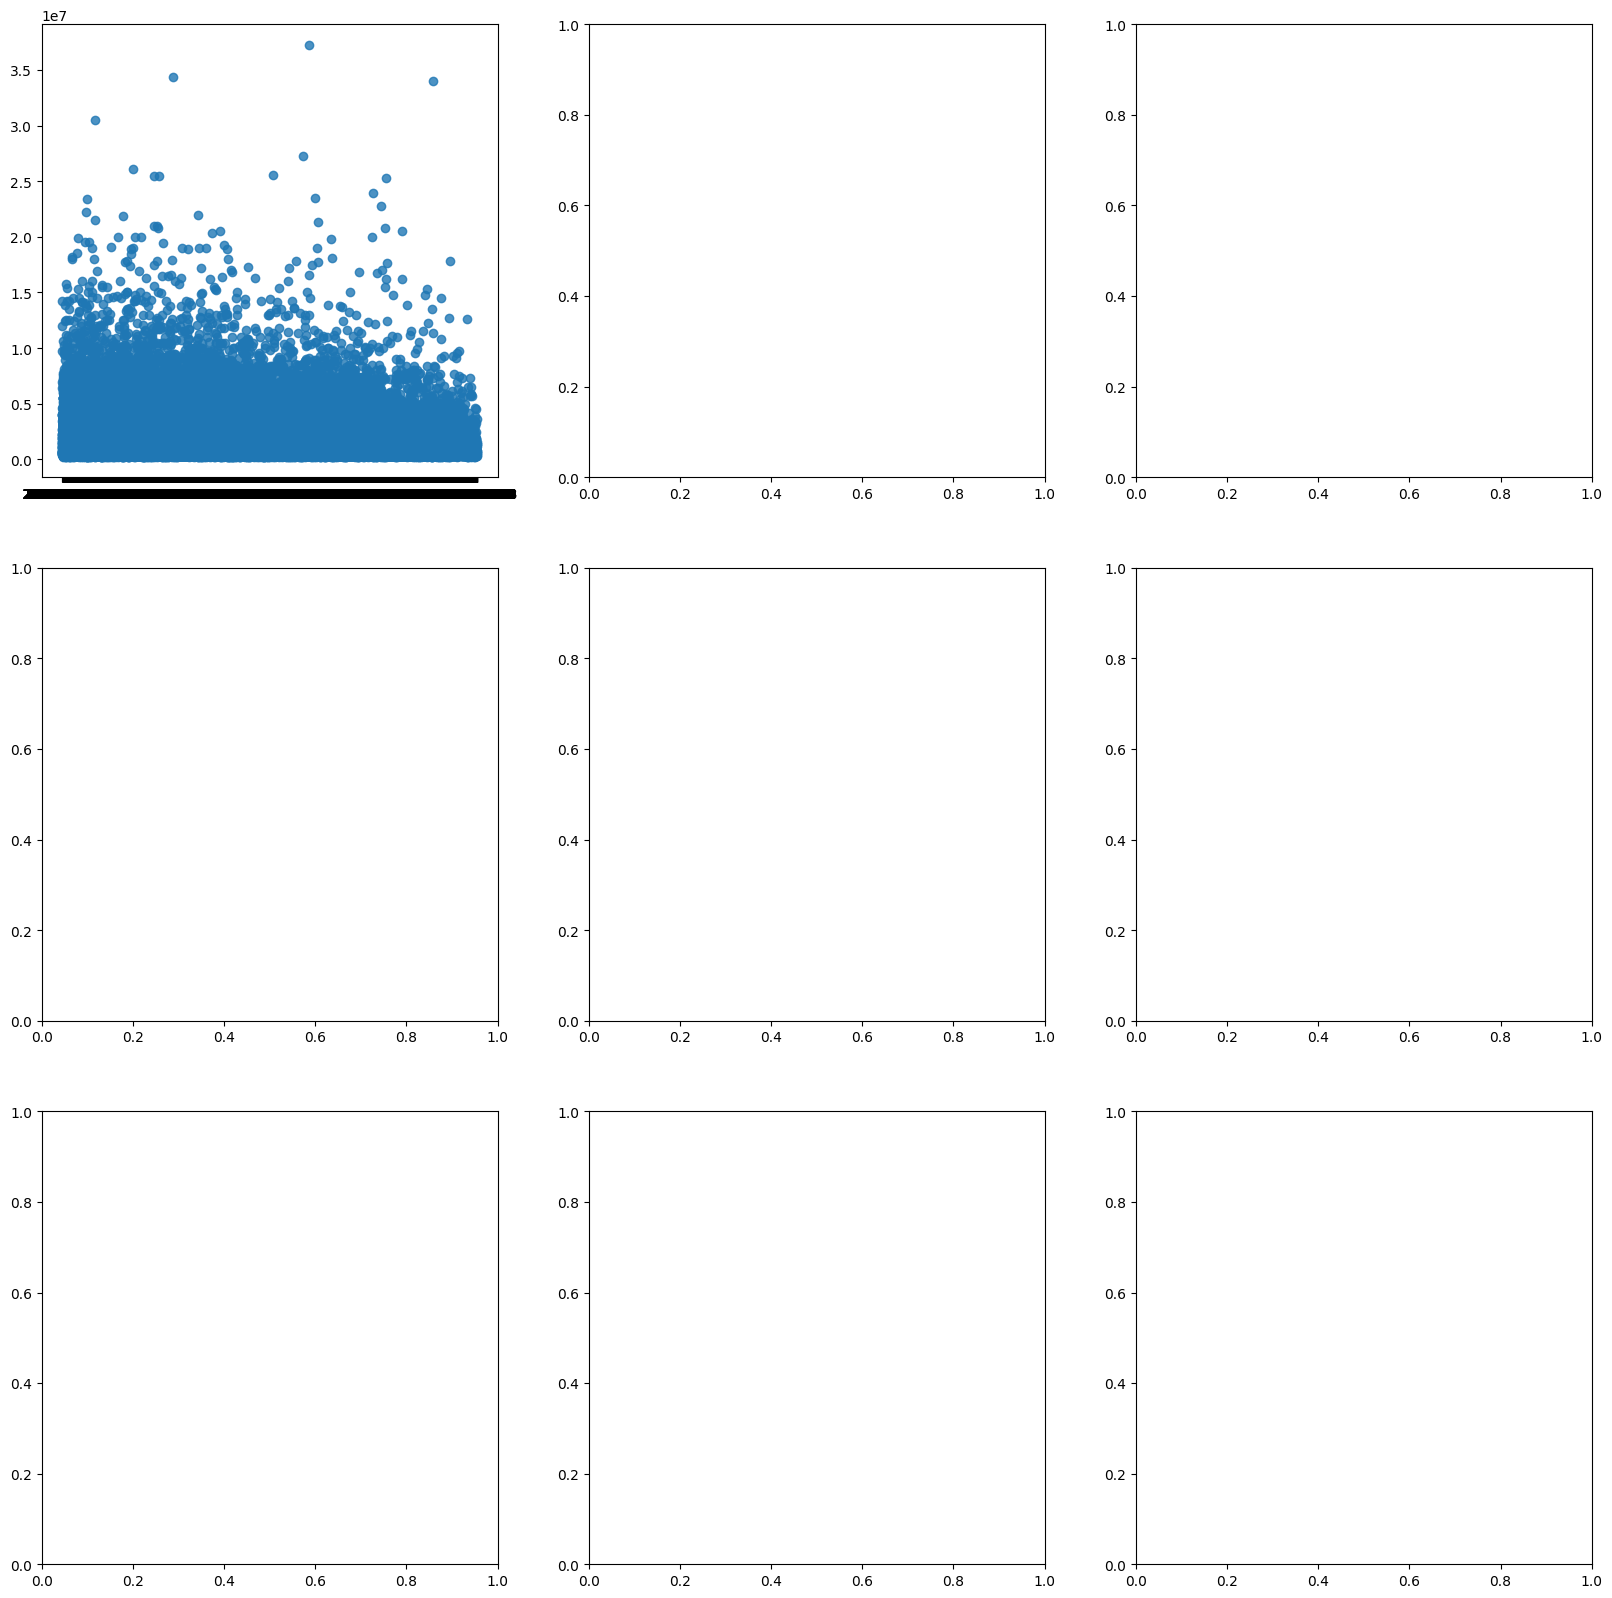

In [67]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20, 20))
for i, ax in zip(X_train.columns, axes.flat):
    sns.regplot(x=X_train[i], y=Y_train, ax=ax).set(title=f"Regplot of : {i}", xlabel="")
plt.show()